In [1]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

In [3]:
# read in csv 'winequality_red.csv" and assign to df_red
df_red = pd.read_csv('winequality-red.csv')
df_white = pd.read_csv('winequality-white.csv')

In [4]:
df_red['type'] = "red"
df_white['type'] = "white"

In [5]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [6]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
df = pd.concat([df_red, df_white], ignore_index=True, axis=0)

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [11]:
# return how many 0 there is in each numerical columns in df
zeros_count = df.select_dtypes(include=['number']).eq(0).sum()
print(zeros_count)

fixed acidity             0
volatile acidity          0
citric acid             151
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64


In [12]:
df.quality.min(), df.quality.max()

(3, 9)

In [13]:
unique_values = sorted(df.quality.unique())
unique_values



[3, 4, 5, 6, 7, 8, 9]

In [14]:
unique_values = sorted(df.quality.unique())
unique_values



[3, 4, 5, 6, 7, 8, 9]

In [15]:
df_quality = df.groupby('quality')

In [16]:
df_quality.size()


quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
dtype: int64

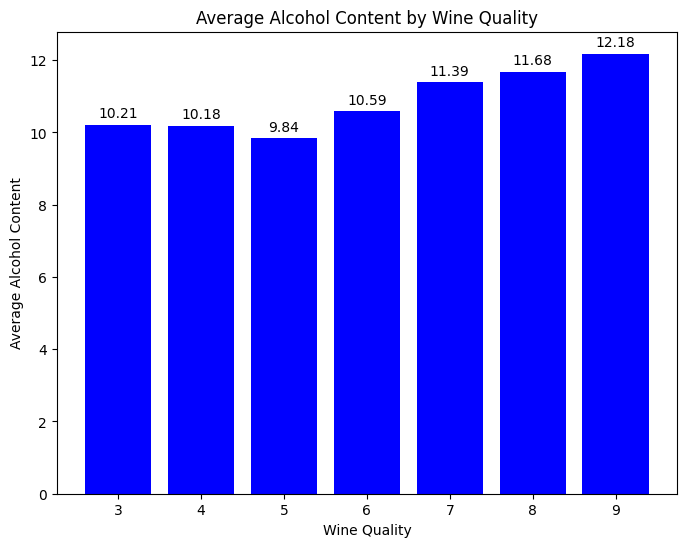

In [17]:
# Calculate the average alcohol content for each quality level
average_alcohol = df.groupby('quality')['alcohol'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(average_alcohol['quality'], average_alcohol['alcohol'], color='blue')
plt.title('Average Alcohol Content by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Average Alcohol Content')

# Add text labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xticks(average_alcohol['quality'])
plt.show()

In [27]:
def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

def add_upper_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)

    for col in df.select_dtypes('number'):
        df[col + '_outliers'] = get_upper_outliers(df[col], k)

    return df


In [28]:

add_upper_outlier_columns(df, k=1.5)

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,citric acid_outliers,residual sugar_outliers,chlorides_outliers,free sulfur dioxide_outliers,total sulfur dioxide_outliers,density_outliers,pH_outliers,sulphates_outliers,alcohol_outliers,quality_outliers
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
outlier_cols = [col for col in df if col.endswith('_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = df[col][df[col] > 0]
    print(data.describe())


~~~
fixed acidity_outliers
count    350.000000
mean       1.362857
std        1.216637
min        0.050000
25%        0.350000
50%        0.950000
75%        1.950000
max        6.250000
Name: fixed acidity_outliers, dtype: float64
~~~
volatile acidity_outliers
count    377.000000
mean       0.121565
std        0.124970
min        0.005000
25%        0.035000
50%        0.080000
75%        0.180000
max        0.925000
Name: volatile acidity_outliers, dtype: float64
~~~
citric acid_outliers
count    230.000000
mean       0.107043
std        0.105912
min        0.010000
25%        0.050000
50%        0.080000
75%        0.140000
max        1.060000
Name: citric acid_outliers, dtype: float64
~~~
residual sugar_outliers
count    1.180000e+02
mean     1.955085e+00
std      4.828027e+00
min      3.552714e-15
25%      3.625000e-01
50%      8.000000e-01
75%      1.900000e+00
max      4.825000e+01
Name: residual sugar_outliers, dtype: float64
~~~
chlorides_outliers
count    286.000000
mean     

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>],
       [<Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>],
       [<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>,
        <Axes: title={'center': 'fixed acidity_outliers'}>,
        <Axes: title={'center': 'volatile acidity_outliers'}>,
        <Axes: title={'center': 'citric acid_outliers'}>],
       [<Axes: title={'center': 'residual sugar_outliers'}>,
        <Axes: title={'center': 'chlorides_outliers'}>,
        <Axes: title={'center': 'free sulfur dioxide_outliers'}>,
        <Axes: title={'center': 'total sulf

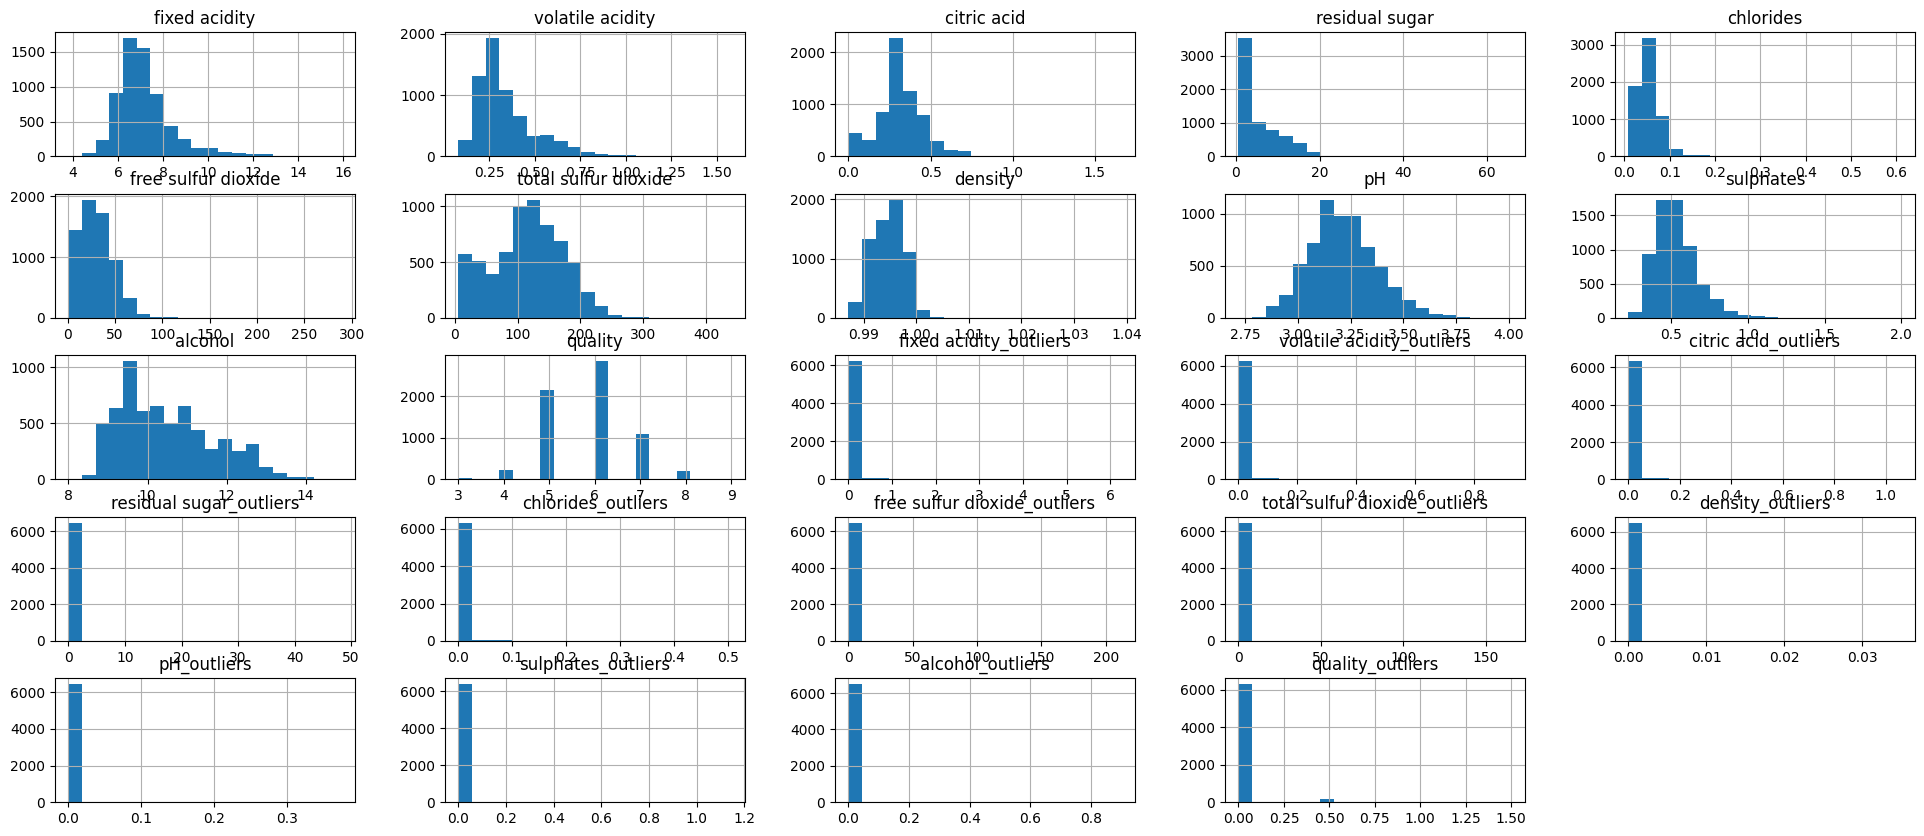

In [30]:
df.hist(figsize=(24, 10), bins=20)


<Axes: >

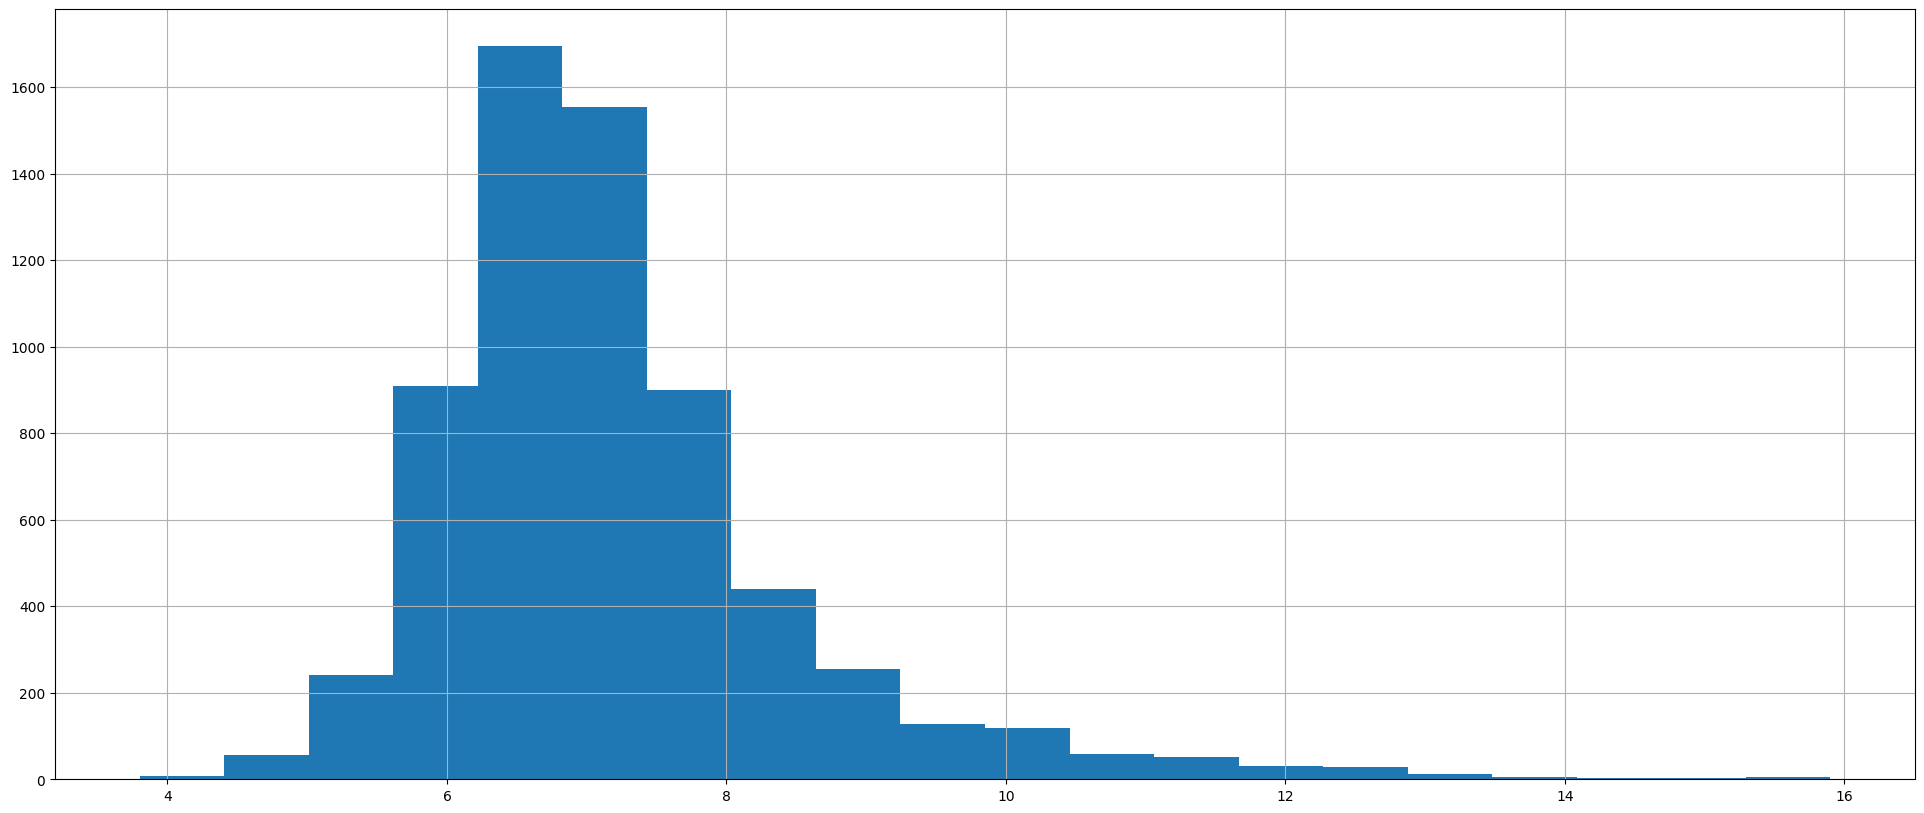

In [32]:
df['fixed acidity'].hist(figsize=(24, 10), bins=20)

# #['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#        'pH', 'sulphates', 'alcohol', 'quality', 'type']

In [35]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,fixed acidity_outliers,volatile acidity_outliers,citric acid_outliers,residual sugar_outliers,chlorides_outliers,free sulfur dioxide_outliers,total sulfur dioxide_outliers,density_outliers,pH_outliers,sulphates_outliers,alcohol_outliers,quality_outliers
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0.00,0.045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0.00,0.225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0.00,0.105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.55,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0.00,0.045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


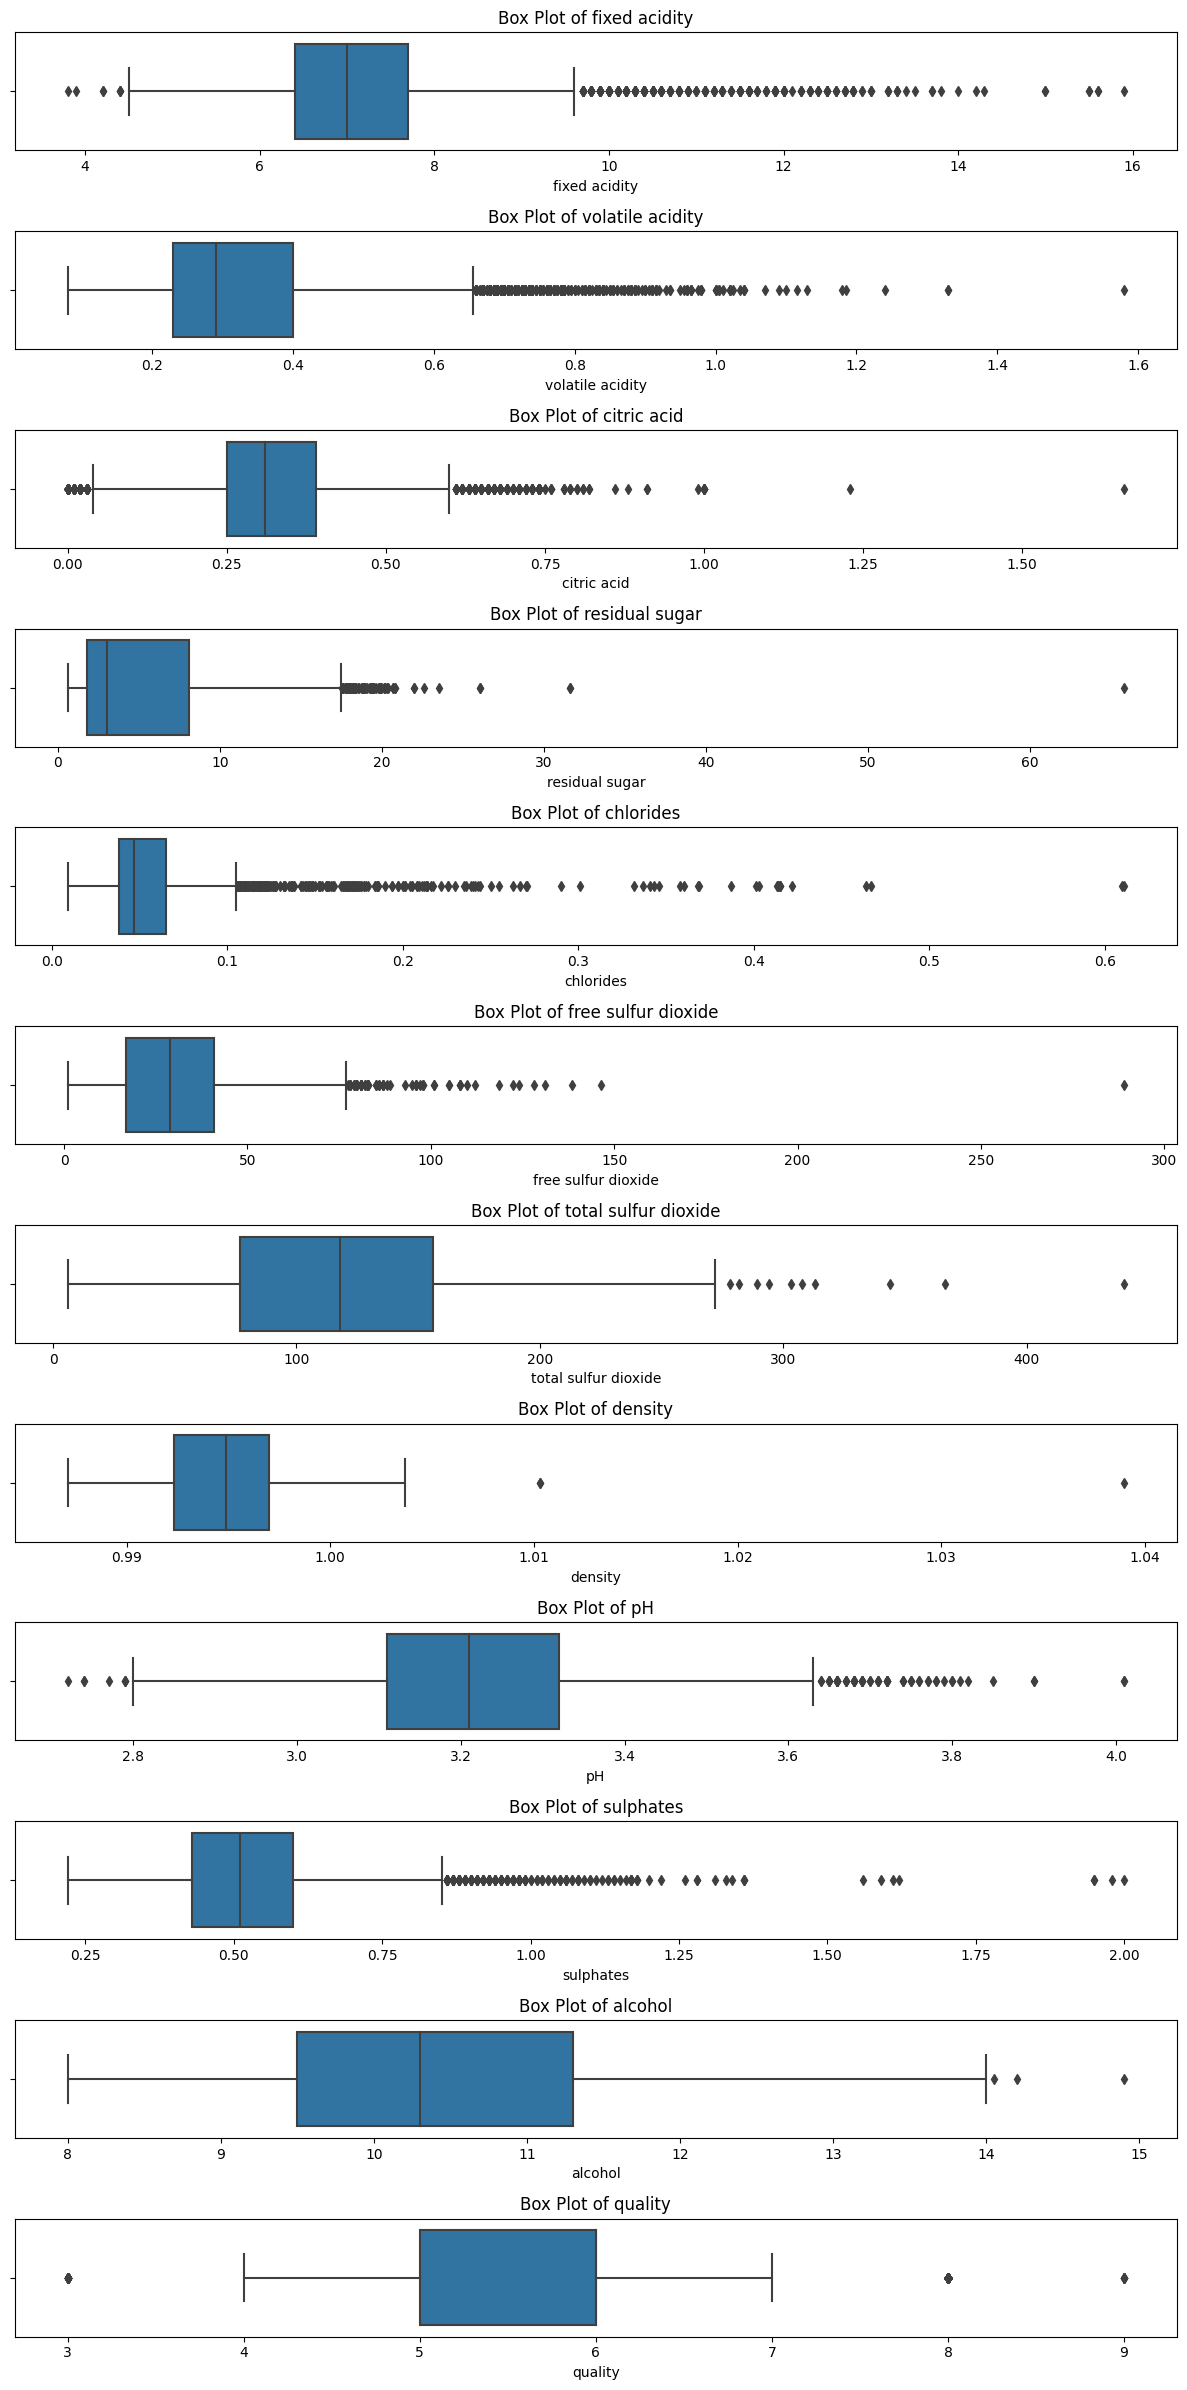

In [19]:
# Assuming your DataFrame is named 'df'
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Set the figure size
plt.figure(figsize=(12, 24))  # Adjust the figure size as needed

# Create a single column of box plots for each numerical column
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(len(numerical_columns.columns), 1, i + 1)
    sns.boxplot(x=column, data=df)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()
